<a href="https://colab.research.google.com/github/Raden616Rizki/PCVK_Ganjil_2023/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**A. PRAKTIKUM**

**1. Buat Gamma Correction sesuai dengan petunjuk berikut**

In [28]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 4


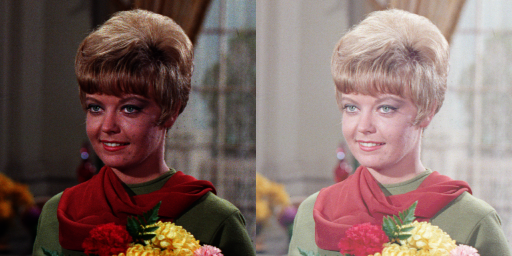

In [34]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
from math import log10, sqrt, pow

print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

def gamma_correction(image, gamma):
  inv_gamma = 1 / gamma

  # table = [((i / 255) ** inv_gamma) * 255 for i in range(256)]
  # table = np.array(table, np.uint8)

  # return cv.LUT(image, table)

  # Akses per pixel
  for y in range(original.shape[0]):
    for x in range(original.shape[1]):
      for c in range(original.shape[2]):
        gamma_image[y, x, c] = np.clip((image[y, x, c] / 255) ** inv_gamma * 255, 0, 255)

  return gamma_image

original = cv.imread('/content/drive/MyDrive/Images/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)
gamma_image = gamma_correction(original, gamma)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)


**2. Buat Simulasi Image Depth**

 Image Depth pada citra 
----------------------------------
Masukkan nilai bit depth: 4


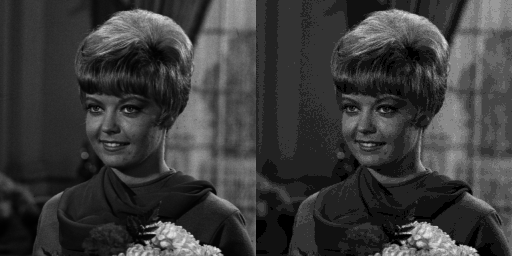

In [37]:
print(' Image Depth pada citra ')
print('----------------------------------')
try:
  bit_depth = int(input('Masukkan nilai bit depth: '))
except ValueError:
  print('Error, not a number')

def image_depth_simulation(image, bit_depth):
  level = 255 / (pow(2,bit_depth)-1)

  # table = [round(i / level) * level for i in range(256)]
  # table = np.array(table, np.uint8)

  # return cv.LUT(image, table)

  # Akses per pixel
  for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        depth_image[y, x] = np.clip(round(image[y, x] / level) * level, 0, 255)

  return depth_image

original = cv.imread('/content/drive/MyDrive/Images/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)
depth_image = image_depth_simulation(original, bit_depth)

final_frame = cv.hconcat((original, depth_image))
cv2_imshow(final_frame)

**3. Buat modul Average Denoising**

In [52]:
import glob

# print(' Average Denoising pada citra ')
# print('----------------------------------')
# try:
#   jumlah_image = int(input('Masukkan nilai jumlah image: '))
# except ValueError:
#   print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Images/galaxy.jpg')

# List Image dalam Folder
cv_img = []
for img in glob.glob('/content/drive/MyDrive/Images/noises/*.jpg'):
  n= cv.imread(img)
  cv_img.append(n)

def calculate_pnsr(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0): # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
    return 100
  max_pixel = 255
  psnr = 20 * log10(max_pixel / sqrt(mse))
  return psnr

def show_ratio(jumlah_image):
  denoised_image = np.zeros(cv_img[0].shape)

  for i in range(jumlah_image):
    denoised_image = denoised_image + cv_img[i]

  denoised_image = np.uint16(denoised_image/jumlah_image)

  pnsr = calculate_pnsr(original, denoised_image)

  print(f'\nNilai PNSR dengan {jumlah_image} image: {pnsr} dB\n')
  print('Original Image')
  cv2_imshow(original)
  print('\nDenoised Image')
  cv2_imshow(denoised_image)
  print('---------------------------------------------------------------------')


Nilai PNSR dengan 5 image: 19.51620279963408 dB

Original Image


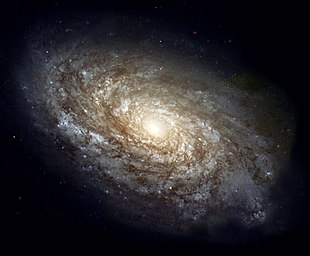


Denoised Image


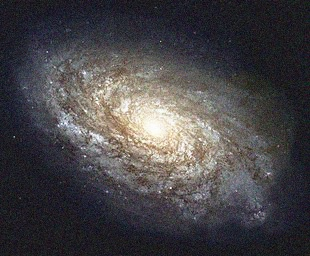

---------------------------------------------------------------------

Nilai PNSR dengan 10 image: 19.726834956314903 dB

Original Image


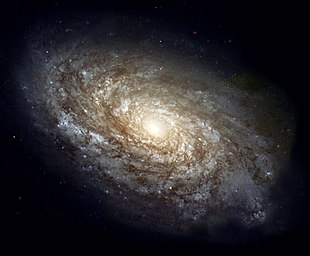


Denoised Image


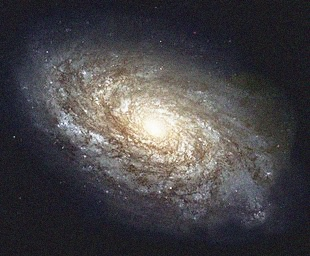

---------------------------------------------------------------------

Nilai PNSR dengan 20 image: 19.837920868626576 dB

Original Image


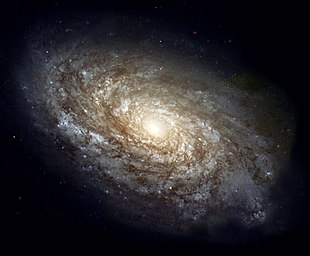


Denoised Image


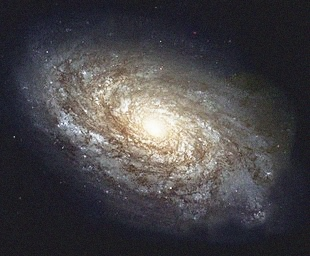

---------------------------------------------------------------------

Nilai PNSR dengan 40 image: 19.888261550509817 dB

Original Image


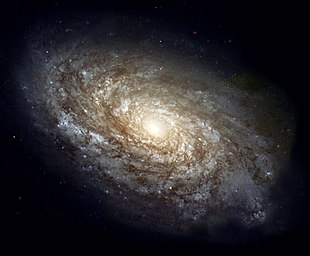


Denoised Image


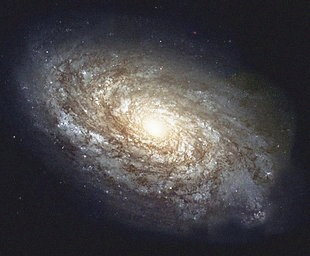

---------------------------------------------------------------------

Nilai PNSR dengan 80 image: 19.915940690580413 dB

Original Image


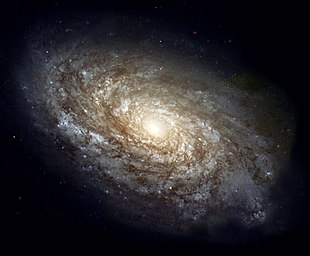


Denoised Image


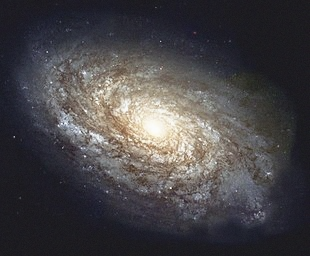

---------------------------------------------------------------------

Nilai PNSR dengan 100 image: 19.92196095594035 dB

Original Image


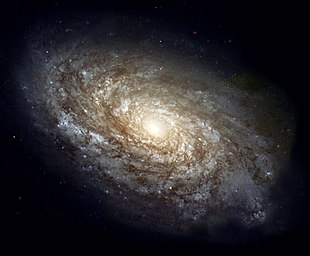


Denoised Image


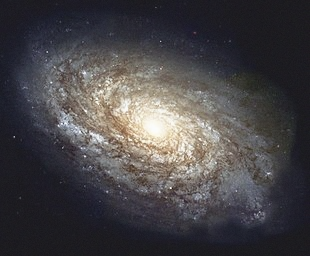

---------------------------------------------------------------------


In [53]:
num_list = [5, 10, 20, 40, 80, 100]

for n in num_list:
  show_ratio(n)

**Kesimpulan:** Dari 6 uji coba diatas, dapat diketahui bahwa semakin banyak gambar yang digunakan, maka akan semakin tinggi pula nilai PNSR-nya dan dengan hasil *denoised image* yang lebih sedikit *noise* saat semakin banyak gambar yang digunakan

**4. Buat image masking untuk image berikut. Image kiri adalah image asli (images/couple.tiff),
sedangkan image paling kanan adalah hasilnya**

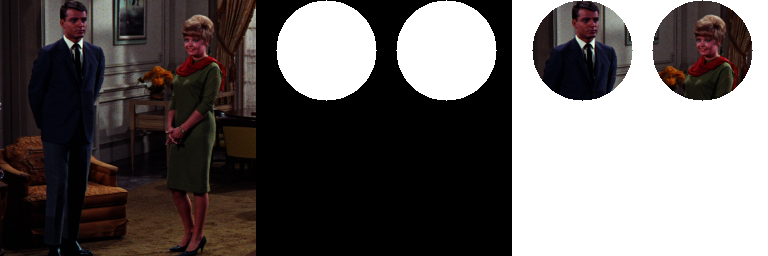

In [156]:
original = cv.imread('/content/drive/MyDrive/Images/couple.tiff')
masking = np.zeros(original.shape, dtype=np.uint8)
masking = cv.circle(masking, (70, 50), 50, (255, 255, 255), -1)

masking1 = np.zeros(original.shape, dtype=np.uint8)
masking1 = cv.circle(masking, (190, 50), 50, (255, 255, 255), -1)

result = original & masking & masking1
result[masking==0] = 255

final_frame = cv.hconcat((original, masking, result))
cv2_imshow(final_frame)

**5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini.
Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu**

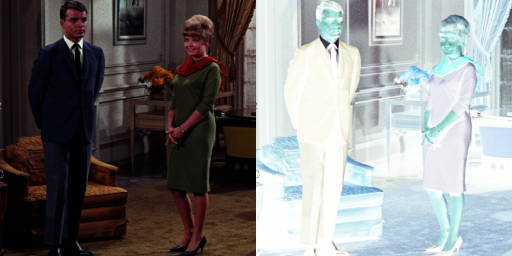

In [157]:
# NOT Operator
# result = original & masking & masking1
result = cv.bitwise_not(original)

final_frame = cv.hconcat((original, result))
cv2_imshow(final_frame)

Penggunaan operator bitwise **not**, warna pada image akan dilakukan inverse, sehingga dapat menghasillkan warna negatif seperti diatas

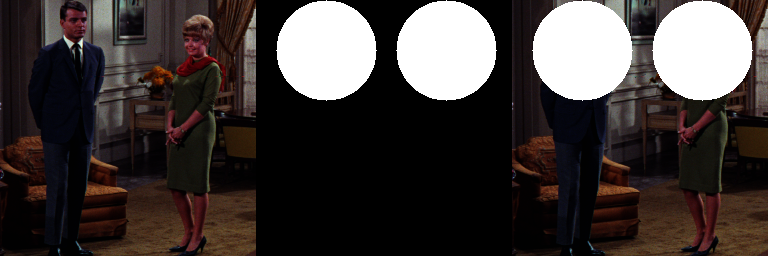

In [158]:
# OR Operator
# result = original | masking | masking1
result = cv.bitwise_or(original, masking)

final_frame = cv.hconcat((original, masking, result))
cv2_imshow(final_frame)

Operator bitwise **or** memungkinkan image dengan masking baik yang beririsan ataupun tidak tetap akan ditampilkan

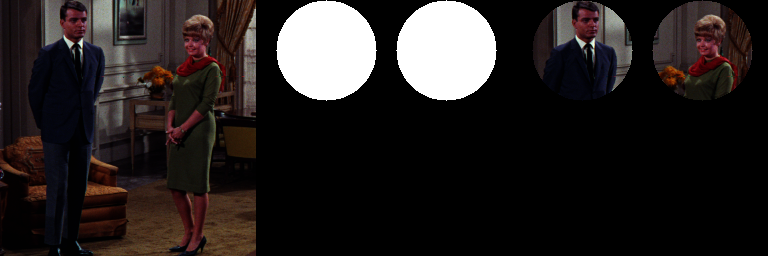

In [159]:
# AND Operator
# result = original & masking & masking1
result = cv.bitwise_and(original, masking)

final_frame = cv.hconcat((original, masking, result))
cv2_imshow(final_frame)

Pada hasil diatas, operator **and** hanya menghasilkan image yang beririsan dengan masking yang sudah dibuat

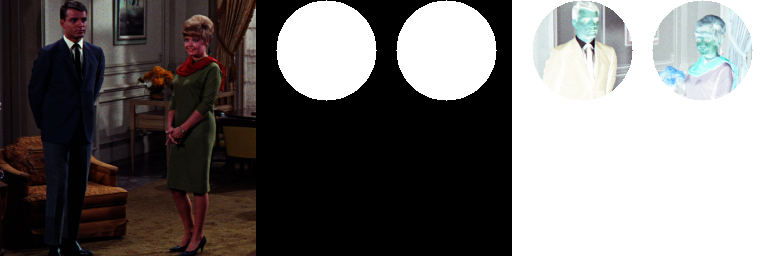

In [140]:
# NAND Operator
# result = ~(original & masking & masking1)
# result = cv.bitwise_not(cv.bitwise_and(original, masking))
result = ~(cv.bitwise_and(original, masking))


final_frame = cv.hconcat((original, masking, result))
cv2_imshow(final_frame)

Sedangkan untuk **Not AND** hasil dari and sebelumnya dilakukan inverse pada warnanya, dan menghasilkan masking dengan background putih, serta image negatif

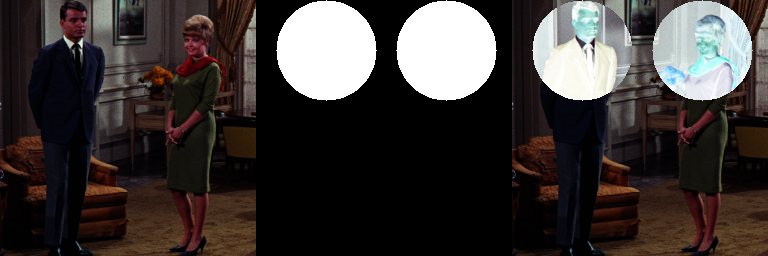

In [138]:
# XOR Operator
# result = original ^ masking ^ masking1
result = cv.bitwise_xor(original, masking)

final_frame = cv.hconcat((original, masking, result))
cv2_imshow(final_frame)

Dan terakhir pada penggunaan operator bitwise **XOR** menampilkan hasil berupa image yang meskipun tidak beririsan, namun tetap ditampilkan dengan kondisi aslinya, sedangkan objek yang beririsan akan dilakukan inverse